In [2]:
import numpy as np
import json
import tqdm

%load_ext autoreload
%autoreload 2
from run_abstractive_summarizer import main
from models.abstractive_summarizer import AbstractiveSummarizer

/home/timoh/L90-Summarization/summarizer_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import argparse
import json

from torchtext.datasets import WikiText2

from models.abstractive_summarizer import AbstractiveSummarizer

In [4]:
hparams = {
    "train_data": "data/train.json",
    "validation_data": "data/validation.json",
    "test_data": "data/test.json",
    'd_model': 512,
    'nhead': 4,
    'd_hid': 512,
    'nlayers': 2,
    'dropout': 0.1,
    'tokenizer': 'wordpiece',
    'learning_rate': 0.001,
    'num_epochs': 10,
    'grad_acc': 1,
    'batch_size': 8
}

In [5]:
with open(hparams['train_data'], 'r') as f:
    train_data = json.load(f)

with open(hparams['validation_data'], 'r') as f:
    validation_data = json.load(f)
    
with open(hparams['test_data'], 'r') as f:
    test_data = json.load(f)


train_articles = [article['article'] for article in train_data]
train_summaries = [article['summary'] for article in train_data]

val_articles = [article['article'] for article in validation_data]
val_summaries = [article['summary'] for article in validation_data]

test_articles = [article['article'] for article in test_data]
test_summaries = [article['summary'] for article in test_data]


In [6]:
np.random.choice(train_articles)

"Mind-boggling statistic of the week. Yesterday marked 9,000 days since Liverpool were last crowned champions of England. They have since been dethroned by rivals Manchester United in terms of title victories and — when hostilities are resumed between the two at Old Trafford on Sunday — there will be an edge perhaps unique to the fixture. It may be almost 25 years since Liverpool last won the league but only months since they blew their big chance to put things right. As Liverpool edged ahead of Manchester City towards the end of last season’s Barclays Premier League title race, United supporters found themselves central to their own worst nightmare. Steven Gerrard scored two penalties in Liverpool's comprehensive 3-0 win at their fierce rivals last season . Gerrard has scored more goals as an away player at Old Trafford than anyone else in Premier League history . ‘Choosing between City and Liverpool for the title was like being offered two different types of disease,’ reflected Barne

In [7]:
np.random.choice(val_articles)

"It's becoming as regular as clockwork at Arsenal: a Theo Walcott contract saga. Just over two years after signing a £90,000-per-week deal, the winger's future is again in the spotlight. As Arsene Wenger so jovially put it last week, contact has been made with 'the embassy' (Walcott's representatives) about a contract extension. Arsenal forward Theo Walcott comes on from the bench against Monaco, is now not a guaranteed starter . But just like two years ago, there are no guarantees Walcott will commit. Perhaps, even more so this time. Ever since recovering from a serious knee injury that kept him out for the majority of last year, Walcott has been on the peripheries. Walcott was flying before injuring his anterior cruciate ligament against Tottenham last January. He'd established himself as an integral member of Wenger's first-team plans. Walcott sprints away in celebration having scored against Leicester during the 2-1 victory last month . Theo Walcott wants a significant pay rise if 

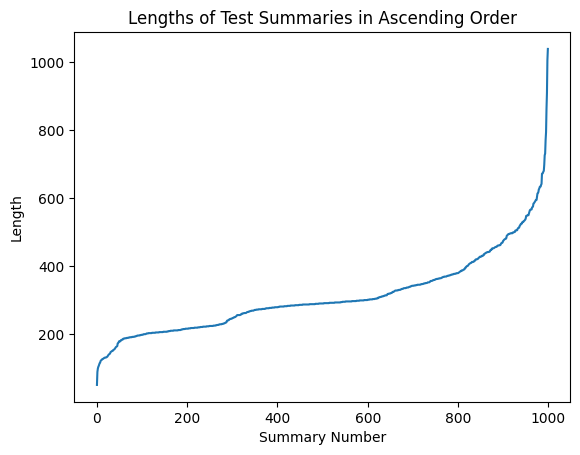

In [12]:
lengths_test_summaries = [len(summary) for summary in test_summaries]
lengths_test_summaries

import matplotlib.pyplot as plt

# Sorting the lengths in ascending order
sorted_lengths = sorted(lengths_test_summaries)

# Plotting
plt.plot(sorted_lengths)
plt.title("Lengths of Test Summaries in Ascending Order")
plt.xlabel("Summary Number")
plt.ylabel("Length")
plt.show()


In [9]:
import torch
print(torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
cuda


In [8]:
model = AbstractiveSummarizer(
    hparams['d_model'], 
    hparams['nhead'], 
    hparams['d_hid'], 
    hparams['nlayers'], 
    hparams['dropout'],
    hparams['tokenizer'],
).to(device)


2023-11-27 20:00:36,031 - INFO - Initializing tokenization vocabulary with method: wordpiece.


2023-11-27 20:00:36,428 - INFO - WordPiece tokenizer initialized with custom special tokens.
/home/timoh/L90-Summarization/summarizer_venv/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [9]:
from torch.utils.data import DataLoader

In [10]:
train_articles[0]

"Playing computer games such as Angry Birds teaches children important life skills including concentration, resilience and problem solving, an academic has said. Professor Angela Mcfarlane, an education expert who will become head of training body the College of Teachers next month, said many games were complex and required deep learning and lateral thinking to solve them. Prof Mcfarlane said she herself had become 'hooked' on the Lemmings computer game, as well as Angry Birds, and said such games could have a place in the classroom provided they were used under supervision. Professor Angela Mcfarlane says computer games like Angry Birds can teach children valuable life-skills . Expert: Prof Mcfarlane says the games can help children learn problem solving, resilience and concentration . She said: 'There are many computer games that require quite deep learning to master the games. 'Some of that learning applies beyond games to wider life, such as concentration, problem solving, and resi

In [11]:
train_summaries[0]

"Professor Angela Mcfarlane is an education expert and former teacher .\nShe says complex computer games require concentration and resilience .\nThe former government adviser says they also teach problem-solving .\nProf Mcfarlane says she herself has been 'hooked' on Lemmings game .\nThe academic is to become head of the College of Teachers next month .\nShe is currently writing a book on education for the 'digital generation'"

In [12]:
train_dataloader = model.preprocess(train_articles[:20], train_summaries[:20], hparams['d_model'], hparams['batch_size'])

2023-11-27 20:00:38,770 - INFO - Tokenizing and converting text to indices using WordPiece in batches.


In [6]:
test_articles[0]

"The mother and daughter who survived a tragic car accident this week, which saw three children die, have been reunited. Aluel Manyang was\xa0moved from the intensive care unit at the Royal Children's about 5.15pm on Friday, and greeted her distraught mother, Akon Goode, with a 'big hug', her father said. 'She didn't believe that her mum was still alive,' Joseph Manyang said, according to the Herald Sun. Scroll down for videos . Aueel Manyang, pictured here as a baby with her mother Akon Guode,\xa0believes her three siblings who died in the crash at a Melbourne lake were eaten by crocodiles in the water . Ms Guode visited her daughter for the first time but did not stay the night in the hospital. Mr Manyang said his daughter was expected to make a '100 per cent' recovery and she should be allowed to go home within four days. The five-year-old girl who survived when a car driven by her mother plunged into a lake believes her three siblings who died in the crash were eaten by crocodiles.

In [10]:
import torch

from models.classes import PositionalEncoding, TokenEmbedding, Seq2SeqTransformer

In [11]:
model = torch.load("models/30_epoch_half_dataset.pt")

In [15]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3

token_transform = get_tokenizer('spacy', language='en_core_web_sm')

def yield_tokens(data_iter: Iterable) -> List[str]:
    for data_sample in data_iter:
        yield token_transform(data_sample)

# Create torchtext's Vocab object for English
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']
vocab_transform = build_vocab_from_iterator(yield_tokens(train_articles),
                                            min_freq=1,
                                            specials=special_symbols,
                                            special_first=True)

vocab_transform.set_default_index(UNK_IDX)

NameError: name 'Iterable' is not defined

In [ ]:
type(token_transform)

In [14]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3

def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

# function to generate output sequence using greedy algorithm
def greedy_decode(model, src, src_mask, max_len, start_symbol):

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


def beam_search_decode(model, src, src_mask, max_len, start_symbol, beam_size):
    # Initialize the beam with the start symbol and an initial score
    initial_beam = (torch.tensor([start_symbol]), 0.0)  # (sequence, score)
    beams = [initial_beam]

    for _ in range(max_len):
        new_beams = []
        for beam in beams:
            # Expand the current beam
            seq, score = beam
            if seq[-1] == EOS_IDX:
                # If the sequence is finished, pass it through
                new_beams.append(beam)
                continue

            # Get probabilities of next words
            # This part depends on your model architecture and may need modification
            prob = get_prob_from_model(model, seq, src, src_mask)
            
            # Choose top `beam_size` continuations
            topk_prob, topk_indices = torch.topk(prob, beam_size)

            for prob, word_idx in zip(topk_prob, topk_indices):
                new_seq = torch.cat([seq, word_idx.view(1)])
                new_score = score + torch.log(prob)
                new_beams.append((new_seq, new_score))

        # Sort all new beams and select the top `beam_size`
        beams = sorted(new_beams, key=lambda x: x[1], reverse=True)[:beam_size]

    # Choose the sequence with the highest score
    best_seq, _ = max(beams, key=lambda x: x[1])
    return best_seq


def get_prob_from_model(model, seq, src, src_mask):
    # Ensure the model is in evaluation mode, which turns off layers like dropout
    model.eval()

    # Encode the source sentence
    memory = model.encode(src, src_mask)
    # Add batch dimension to sequence for compatibility with the model
    seq = seq.unsqueeze(1)

    # Create a target mask for the sequence
    tgt_mask = generate_square_subsequent_mask(seq.size(0)).to(DEVICE)

    # Decode the sequence
    output = model.decode(seq, memory, tgt_mask)

    # Convert the output to probabilities using the generator
    prob = model.generator(output[-1])

    return torch.softmax(prob, dim=-1).squeeze(0)


# actual function summarize a piece of text
def summarize(model: torch.nn.Module, src_sentence: str, decoding_method: str = 'greedy'):
    model.eval()
    src = text_transform(src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    max_len = 50

    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    if decoding_method == 'greedy':
        tgt_tokens = greedy_decode(model, src, src_mask, max_len, start_symbol=BOS_IDX)


    elif decoding_method == 'beam_search':
        beam_size = 5
        # Assuming beam_size is defined or passed as an argument
        tgt_tokens = beam_search_decode(
            model, 
            src, 
            src_mask, 
            max_len, 
            start_symbol=BOS_IDX, 
            beam_size=beam_size
        )

    else:
        raise ValueError("Invalid decoding method. Choose 'greedy' or 'beam_search'.")

    tgt_tokens = tgt_tokens.flatten()
    outputted_text = vocab_transform.lookup_tokens(list(tgt_tokens.cpu().numpy()))
    return " ".join(outputted_text).replace("<bos>", "").replace("<eos>", "")

In [ ]:
article = """
Playing computer games such as Angry Birds teaches children important life skills including concentration, resilience and problem solving, an academic has said. Professor Angela Mcfarlane, an education expert who will become head of training body the College of Teachers next month, said many games were complex and required deep learning and lateral thinking to solve them. Prof Mcfarlane said she herself had become 'hooked' on the Lemmings computer game, as well as Angry Birds, and said such games could have a place in the classroom provided they were used under supervision. Professor Angela Mcfarlane says computer games like Angry Birds can teach children valuable life-skills . Expert: Prof Mcfarlane says the games can help children learn problem solving, resilience and concentration . She said: 'There are many computer games that require quite deep learning to master the games. 'Some of that learning applies beyond games to wider life, such as concentration, problem solving, and resilience - important life skills. 'Anyone who has tried to play complex video games will know they are difficult.' Speaking to The Times, Prof Mcfarlane said she had developed an obsession with both Angry Birds and a precursor, Lemmings, because they had made her think and get her strategy right. The education expert, who has advised the government on educational technology, and who is currently writing a book, Authentic Learning for the Digital Generation, said computer games could be used in the classroom to good effect provided it was done properly. Prof Mcfarlane said even pre-school children could benefit from games, as long as they were supervised and not just given a phone to play with to keep them quiet. Prof Mcfarlane said she herself had become 'hooked' on a computer game called Lemmings, pictured . She said some games could teach children fine motor control, or help with vocabulary or simple maths, and taught skills such as resilience that could be applicable to real life. Next month Prof Mcfarlane, who began her career as a secondary school teacher and head of department, will become chief executive and registrar of the College of Teachers, which offers professional training to teachers and support staff.
"""

summarize(transformer, article, decoding_method='beam_search')